import pandas to clean and read data

In [1]:
import pandas as pd

read titanic_dataset.csv data

In [2]:
df = pd.read_csv('titanic_dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


First, drop columns from the dataset that are obviously unnecessary for your model.

Dropping columns "Name","PassengerID", "Ticket" since this is uncessary for the model

In [4]:
df = df.drop(["PassengerId","Name", "Ticket"],axis=1)

Dropping "Cabin" as well since over 77% of records are NAN

In [5]:
(len(df) - df['Cabin'].count())/len(df)

0.7710437710437711

In [6]:
df = df.drop(["Cabin"],axis=1)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Then, assign the dataset's median Age to rows where the age data is missing.

Check how many NAN in 'Age'

In [8]:
len(df) - df['Age'].count()

177

to calculate median, first we need to sort the data by Age, then calculate the median of the Age predictor

In [9]:
df=df.sort_values(by=['Age'])

Then, replace NAN in "Age" with the median age.

In [10]:
df['Age']=df['Age'].fillna(df['Age'].median())

Check to ensure all NAN are replaced

In [11]:
len(df) - df['Age'].count()

0

Before spliting the data for modeling, convert Sex to integer form. Male=0 and female=1

In [12]:
df['Sex']=df.Sex.map({'male':0,'female':1})

"Embarked" column is categorical. We will create dummy variables for categorical festures with Pandas get_dummies

Join new created feature to df

Drop the one of the variables in the new features to prevent perfect multi-collinearity

Remove original column ('Embarked')


In [13]:
embarked_dummy= pd.get_dummies(df['Embarked'],prefix='Embarked')

In [14]:
df=df.join(embarked_dummy)

In [15]:
df.drop(['Embarked','Embarked_C'], axis=1, inplace=True)

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
803,1,3,0,0.42,0,1,8.5167,0,0
755,1,2,0,0.67,1,1,14.5000,0,1
644,1,3,1,0.75,2,1,19.2583,0,0
469,1,3,1,0.75,2,1,19.2583,0,0
78,1,2,0,0.83,0,2,29.0000,0,1


Split the dataset into a training set and test set.

Import sklearn to split the df

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=.2,random_state=112)

Fit your initial model, and identify and remove from consideration predictors that are not significant.

Import statsmodels API

In [19]:
import statsmodels.api as sm

Add constant to X (features) variables (adding it for X_test as well for testing later)

In [20]:
X_train= sm.add_constant(X_train)
X_test= sm.add_constant(X_test)

Fit Logistic Regression

In [21]:
logit =sm.GLM(Y_train,X_train,family=sm.families.Binomial())

In [22]:
result= logit.fit()

Print summary

In [23]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      703
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -294.25
Date:                Mon, 25 Mar 2019   Deviance:                       588.49
Time:                        19:51:10   Pearson chi2:                     749.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8215      0.595      4.741      0.000       1.655       3.988
Pclass        -1.2348      0.169     -7.325      0.0

In [24]:
print(result.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            606.4914  
Link Function:      logit            BIC:            -4028.8674
Dependent Variable: Survived         Log-Likelihood: -294.25   
Date:               2019-03-25 19:51 LL-Null:        -471.54   
No. Observations:   712              Deviance:       588.49    
Df Model:           8                Pearson chi2:   749.      
Df Residuals:       703              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
const        2.8215    0.5951   4.7414  0.0000   1.6552   3.9879
Pclass      -1.2348    0.1686  -7.3255  0.0000  -1.5651  -0.9044
Sex          2.9235    0.2331  12.5431  0.0000   2.4667   3.3804
Age         -0.0429    0.0091  -4.7084  0.0000  -

From the P valuesin the model fit summary, 'Parch', 'Fare', and 'Embarked' are not statistically significant.
We are going to drop these predictors from highest to lowest P value one by one to see if the model improve.

*** I am going to drop the same features from both train and test sets since we will test the model with the test data later***

Drop 'Embarked_Q' and 'Embarked_S'

In [25]:
X_train.drop(['Embarked_Q', 'Embarked_S'],axis=1,inplace=True)
X_test.drop(['Embarked_Q', 'Embarked_S'],axis=1,inplace=True)

Fit the model with new X_train

In [26]:
result= sm.GLM(Y_train,X_train,family=sm.families.Binomial()).fit()

In [27]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      705
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -296.51
Date:                Mon, 25 Mar 2019   Deviance:                       593.02
Time:                        19:51:10   Pearson chi2:                     758.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4352      0.558      4.361      0.000       1.341       3.530
Pclass        -1.2070      0.163     -7.406      0.0

In [28]:
print(result.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            607.0175  
Link Function:      logit            BIC:            -4037.4774
Dependent Variable: Survived         Log-Likelihood: -296.51   
Date:               2019-03-25 19:51 LL-Null:        -471.54   
No. Observations:   712              Deviance:       593.02    
Df Model:           6                Pearson chi2:   758.      
Df Residuals:       705              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
const        2.4352    0.5583   4.3614  0.0000   1.3408   3.5295
Pclass      -1.2070    0.1630  -7.4058  0.0000  -1.5264  -0.8875
Sex          2.9589    0.2324  12.7313  0.0000   2.5034   3.4145
Age         -0.0430    0.0091  -4.7310  0.0000  -

Dropping 'Parch'

In [29]:
X_train.drop('Parch',axis=1,inplace=True)
X_test.drop('Parch',axis=1,inplace=True)

Fit model with new X_train

In [30]:
result= sm.GLM(Y_train,X_train,family=sm.families.Binomial()).fit()

Print summary

In [31]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      706
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -297.30
Date:                Mon, 25 Mar 2019   Deviance:                       594.60
Time:                        19:51:10   Pearson chi2:                     770.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4513      0.556      4.408      0.000       1.361       3.541
Pclass        -1.2242      0.162     -7.560      0.0

In [32]:
print(result.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            606.6029  
Link Function:      logit            BIC:            -4042.4601
Dependent Variable: Survived         Log-Likelihood: -297.30   
Date:               2019-03-25 19:51 LL-Null:        -471.54   
No. Observations:   712              Deviance:       594.60    
Df Model:           5                Pearson chi2:   770.      
Df Residuals:       706              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
const        2.4513    0.5561   4.4079  0.0000   1.3614   3.5413
Pclass      -1.2242    0.1619  -7.5598  0.0000  -1.5416  -0.9068
Sex          2.8969    0.2257  12.8331  0.0000   2.4545   3.3394
Age         -0.0426    0.0090  -4.7029  0.0000  -

Dropping 'Fare'

In [33]:
X_train.drop('Fare',axis=1,inplace=True)
X_test.drop('Fare',axis=1,inplace=True)

fit the model again

In [34]:
result=sm.GLM(Y_train,X_train,family=sm.families.Binomial()).fit()

Print new summary

In [35]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      707
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -297.64
Date:                Mon, 25 Mar 2019   Deviance:                       595.29
Time:                        19:51:10   Pearson chi2:                     768.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6594      0.494      5.379      0.000       1.690       3.628
Pclass        -1.2889      0.142     -9.107      0.0

In [36]:
print(result.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            605.2875  
Link Function:      logit            BIC:            -4048.3436
Dependent Variable: Survived         Log-Likelihood: -297.64   
Date:               2019-03-25 19:51 LL-Null:        -471.54   
No. Observations:   712              Deviance:       595.29    
Df Model:           4                Pearson chi2:   768.      
Df Residuals:       707              Scale:          1.0000    
Method:             IRLS                                       
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
const        2.6594    0.4944   5.3790  0.0000   1.6904   3.6283
Pclass      -1.2889    0.1415  -9.1070  0.0000  -1.5663  -1.0115
Sex          2.9115    0.2251  12.9314  0.0000   2.4702   3.3527
Age         -0.0431    0.0090  -4.7777  0.0000  -

From the P vales, features in the model now are all statistically significant.

Plot a ROC curve and find the optimal cutoff probability

Fit Logistic Regression model.

Import Logistics Regression from Sklearn

In [37]:
from sklearn.linear_model import LogisticRegression

fit train data into the Logistics Regression

In [38]:
logit=LogisticRegression()

In [39]:
logit.fit(X_train,Y_train)

A:\Python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Create class predictions on X_test

In [40]:
predictions= logit.predict(X_test)

Calculate accuracy score

In [41]:
logit.score(X_test,Y_test)

0.7150837988826816

Calculat error rate

In [42]:
1-logit.score(X_test,Y_test)

0.2849162011173184

Plot a ROC curve and find the optimal cutoff probability
import roc_curve and roc_auc_score for ROC curve and matplotlib to plot the curve

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

Calculate auc and roc_curve

In [44]:
prob=logit.predict_proba(X_test)[::,1]

In [45]:
auc=roc_auc_score(Y_test, prob)
print(auc)

0.7865508365508366


In [46]:
fpr, tpr, threshold = roc_curve(Y_test, prob)

Plot ROC curve

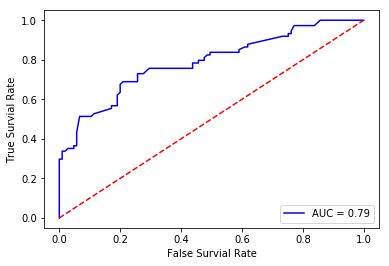

In [47]:
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Survial Rate')
plt.xlabel('False Survial Rate')

plt.legend(loc = 'lower right')


plt.show()

Calculate optimal threshold probability from the ROC curve

In [48]:
import numpy as np

In [49]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]

In [50]:
optimal_threshold

0.35887866536084573

Update your predictions using the optimal cutoff

In [51]:
new_predictions = np.where(prob>optimal_threshold,1,0)

Create a confusion matrix using your final predictions

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [53]:
Confusion_mat=confusion_matrix(Y_test,new_predictions)

In [54]:
Confusion_df = pd.DataFrame(Confusion_mat, index=['Actual not survive','Actual survive'], columns=['Predicted not survive','Predicted survive'])

In [55]:
Confusion_df 

,Predicted not survive,Predicted survive
Actual not survive,84,21
Actual survive,24,50


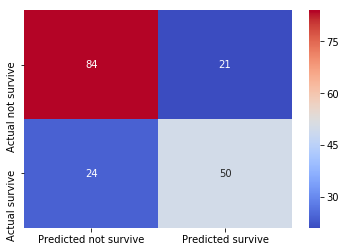

In [56]:
_=sns.heatmap(Confusion_df , cmap='coolwarm', annot=True)